In [11]:
import matplotlib
from matplotlib import pyplot as plt
import math
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import imageio
import pylab
from matplotlib.ticker import MultipleLocator, FormatStrFormatter
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from scipy.optimize import curve_fit
from scipy import asarray as ar,exp
from scipy.stats import chisquare
import matplotlib.ticker as mtick
from matplotlib.ticker import ScalarFormatter
import scipy
import scipy.stats as stats
from scipy import stats
from scipy.stats import maxwell



Polynomial = np.polynomial.Polynomial

In [12]:
filename = (r"Spring_2021_MPAG_DeLucia2006a_Velocities")

file = open(filename, 'r')

survey = np.loadtxt(file)

X_vel = survey[:, 0]  

Y_vel = survey[:, 1]        

Z_vel = survey[:, 2]

In [13]:
Num_Vel_Between_T = []

In [14]:
Total_T = np.sqrt((np.array(X_vel)**2 + np.array(Y_vel)**2 + np.array(Z_vel)**2)) #magnitude of velocities

In [15]:
for j in bins:
    Vel_Between_T = np.size(np.where(np.logical_and( j < Total_T, j + step > Total_T)))
    Num_Vel_Between_T.append(Vel_Between_T)

# Things I've tried:

#One

    #def func(x, A):
    #    return ((np.sqrt(2/np.pi) * (((x**2 * np.exp(-x**2)) / (2*A**2))/(A**3)))) #Normal distribution

    #x = bin_center = bin_borders[:-1] + np.diff(bin_borders) / 2

    #popt, pcov = curve_fit(func, xdata= bin_center, ydata= bin_height)

    #plt.plot(x, func(x, *popt), color='white', linewidth=5, label=r'Fitted function')
    

#Another 

    #maxwell.pdf(x) = sqrt(2/pi)*x**2 * exp(-x**2/2)

    #params = stats.maxwell.fit(X_vel, floc = 0)
    #mean = 2*params[1]*np.sqrt(2/np.pi)
    #sig = (params[1]**(3*np.pi-8)/np.pi)
    
    #mean,  var, skew, kurt = scipy.stats.maxwell.stats(moments='mvsk')

    #plt.plot(Total_T, scipy.stats.maxwell.pdf(X_vel), color = "white")


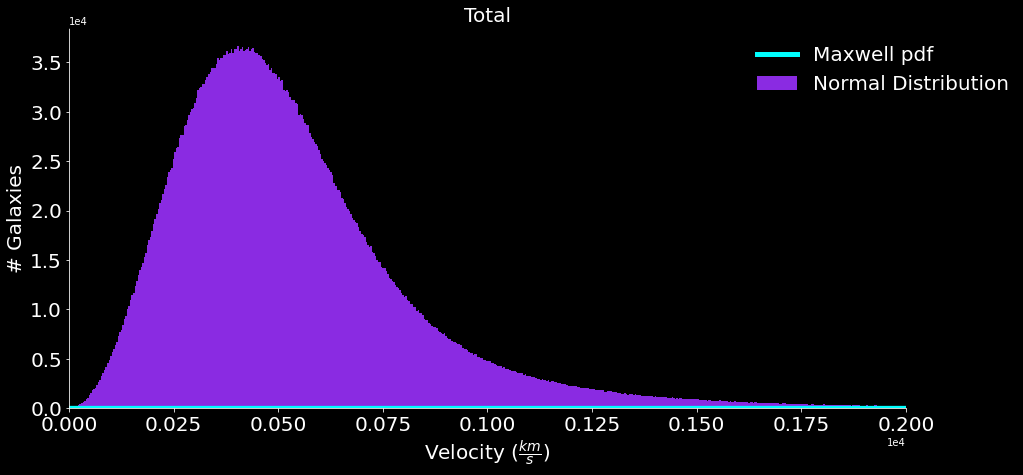

In [20]:
fig, ax = plt.subplots(figsize =(15, 7), facecolor = "black")

Bins = np.array(average_velocity_per_bin)
bin_height , bin_borders,_ = plt.hist(np.array(Total_T), bins = 'auto', color = "blueviolet", label = "Normal Distribution")

plt.title('Total', size = '20', color = "white")
plt.ticklabel_format(axis='both', style='sci', scilimits=(4,4))
plt.ylabel(r'# Galaxies' , size = 20, color = "white")
plt.xlabel(r'Velocity ($\frac{km}{s}$)' , size = 20, color = "white")
plt.xticks(size = 20, color = "white")
plt.yticks(size = 20)

ax.set_xlim(0, 2000)

ax.set_facecolor("black")
ax.spines["bottom"].set_color("white")
ax.spines["left"].set_color("white")

x = np.linspace((min(Total_T)), (max(Total_T)))
#print(maxwell.ppf(min(Total_T)),max(Total_T))

#mean, var, skew, kurt = maxwell.stats(moments='mvsk')

rv = maxwell()

ax.plot(x, rv.pdf(x), color = 'aqua', linewidth = 5, label='Maxwell pdf')


plt.legend(facecolor = "black", labelcolor = "white", fontsize = 20, frameon = False, bbox_to_anchor=(0.8, 1), loc='upper left')


ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')
ax.xaxis.label.set_color('white')
ax.tick_params(axis='x', colors='white')
ax.yaxis.label.set_color('white')
ax.tick_params(axis='y', colors='white')


plt.show()